In [ ]:
from tensorflow import keras
import os
from google.colab import drive
import random as rn
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Dataset load and preprocessing**

## Loading test set and preprocessing

In [ ]:
out_path = '/content/drive/My Drive/Ritorti[_Pasco]/project/numpy_data'

def load_testing():
  images = np.load(os.path.join(out_path,'public_test_tensor.npy'))
  labels = np.load(os.path.join(out_path,'public_test_labels.npy'))
  return images,labels

test_images, test_labels = load_testing()
test_labels_mass_calc = []

#testing mass-calc
for la in test_labels:
  if la == 1 or la == 2: #masses -> 0
    test_labels_mass_calc.append(0)
  elif la == 3 or la == 4: #calcification -> 1
    test_labels_mass_calc.append(1)

test_labels_mass_calc = np.array(test_labels_mass_calc)

## Loading predictions from pre-saved csv file

In [ ]:
import csv
import pandas as pd

dir_data_store ="/content/drive/My Drive/Ritorti[_Pasco]/data_store"

y_pred31 = np.loadtxt(os.path.join(dir_data_store,"predictions_31.csv"))
y_pred31 = y_pred31.astype(int)
y_pred21 = np.loadtxt(os.path.join(dir_data_store,"predictions_21.csv"))
y_pred21 = y_pred21.astype(int)

unique, counts = np.unique(test_labels_mass_calc, return_counts=True)
print('true',dict(zip(unique, counts)))
unique, counts = np.unique(y_pred31, return_counts=True)
print('pred_mod31',dict(zip(unique, counts)))
unique, counts = np.unique(y_pred21, return_counts=True)
print('pred_mod21',dict(zip(unique, counts)))

true {0: 179, 1: 157}
pred_mod31 {0: 202, 1: 134}
pred_mod21 {0: 173, 1: 163}


# **Execute the ensamble classification**

In [ ]:
final_pred = 0.5*(y_pred21+y_pred31)

In [ ]:
final_pred = np.round(final_pred)
final_pred = final_pred.astype(int)
final_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,

In [ ]:
unique, counts = np.unique(final_pred, return_counts=True)
print('final_pred',dict(zip(unique, counts)))

final_pred {0: 220, 1: 116}


# **Evaluating the model with the test set**

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(test_labels_mass_calc,final_pred)

array([[175,   4],
       [ 45, 112]])

In [ ]:
# accuracy: (TP+TN)/(TP+FP+FN+TN): percentage of correctly predicted samples
metrics.accuracy_score(test_labels_mass_calc,final_pred)

0.8541666666666666

In [ ]:
# precision: TP/(TP+FP): The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
metrics.precision_score(test_labels_mass_calc,final_pred)

0.9655172413793104

In [ ]:
# recall: TP/(TP+FN): The recall is intuitively the ability of the classifier to find all the positive samples.
metrics.recall_score(test_labels_mass_calc,final_pred)

0.7133757961783439

In [ ]:
# f1-score: 2*(precision*recall)/(precision + recall). The F1-score is the harmonic mean of precision and sensitivity
metrics.f1_score(test_labels_mass_calc,final_pred)

0.8205128205128205

In [ ]:
# classification report: Build a text report showing the main classification metrics
print(metrics.classification_report(test_labels_mass_calc,final_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       179
           1       0.97      0.71      0.82       157

    accuracy                           0.85       336
   macro avg       0.88      0.85      0.85       336
weighted avg       0.87      0.85      0.85       336



In [ ]:
fpr,tpr,th = metrics.roc_curve(test_labels_mass_calc,final_pred)
roc_auc = metrics.roc_auc_score(test_labels_mass_calc,final_pred)

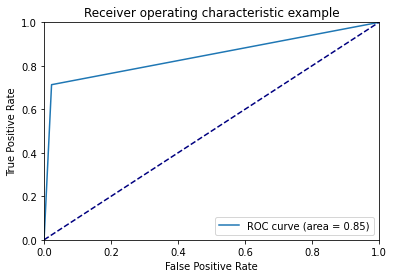

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#plt.savefig(os.path.join(dir_img,"ROC_curve.png"))
plt.show()